In [20]:
import pandas as pd
df=pd.read_csv('HR_comma_sep.csv')
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [21]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [22]:
retain=df[df['left']==0]
retain.shape

(11428, 10)

In [23]:
newdf=df.drop(columns=['Department','salary'])
newdf.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<Axes: xlabel='salary'>

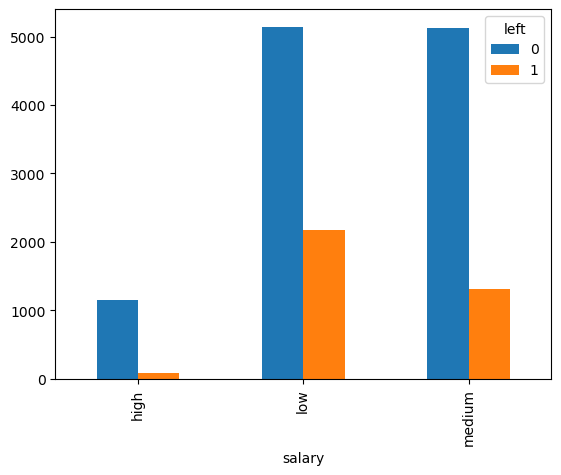

In [24]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

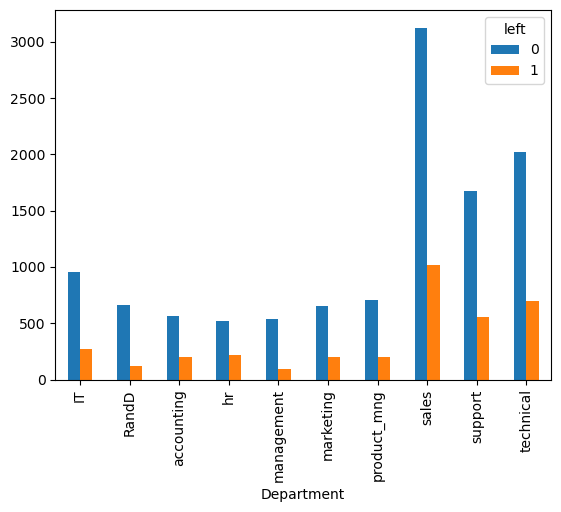

In [27]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [58]:
X=df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']]
Y=df[['left']]
print(X.to_string())
print(Y.to_string())

       satisfaction_level  average_montly_hours  time_spend_company  promotion_last_5years  salary
0                    0.38                   157                   3                      0     low
1                    0.80                   262                   6                      0  medium
2                    0.11                   272                   4                      0  medium
3                    0.72                   223                   5                      0     low
4                    0.37                   159                   3                      0     low
5                    0.41                   153                   3                      0     low
6                    0.10                   247                   4                      0     low
7                    0.92                   259                   5                      0     low
8                    0.89                   224                   5                      0     low
9         

In [59]:
crdf=pd.get_dummies(X,dtype=int)
crdf

satisfaction_level  average_montly_hours  time_spend_company  \
0                    0.38                   157                   3   
1                    0.80                   262                   6   
2                    0.11                   272                   4   
3                    0.72                   223                   5   
4                    0.37                   159                   3   
...                   ...                   ...                 ...   
14994                0.40                   151                   3   
14995                0.37                   160                   3   
14996                0.37                   143                   3   
14997                0.11                   280                   4   
14998                0.37                   158                   3   

       promotion_last_5years  salary_high  salary_low  salary_medium  
0                          0            0           1              0  
1                          0            0           0              1  
2                          0            0           0              1  
3                          0            0           1              0  
4                          0            0           1              0  
...                      ...          ...         ...            ...  
14994                      0            0           1              0  
14995                      0            0           1              0  
14996                      0            0           1              0  
14997                      0            0           1              0  
14998                      0            0           1              0  

[14999 rows x 7 columns]

In [60]:
XLog=crdf
YLog=df['left']
print(XLog.to_string())

       satisfaction_level  average_montly_hours  time_spend_company  promotion_last_5years  salary_high  salary_low  salary_medium
0                    0.38                   157                   3                      0            0           1              0
1                    0.80                   262                   6                      0            0           0              1
2                    0.11                   272                   4                      0            0           0              1
3                    0.72                   223                   5                      0            0           1              0
4                    0.37                   159                   3                      0            0           1              0
5                    0.41                   153                   3                      0            0           1              0
6                    0.10                   247                   4                

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [62]:
x1_train,x1_test,y1_train,y1_test=train_test_split(XLog,YLog,test_size=0.20)
print(x1_train.shape)
print(x1_test.shape)

(11999, 7)
(3000, 7)


In [63]:
LogReg=LogisticRegression()
LogReg.fit(x1_train,y1_train)

LogisticRegression()

In [66]:
result=LogReg.predict(x1_test)
result

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
LogReg.score(x1_train,y1_train)


0.7704808734061172

In [69]:
LogReg.score(x1_test,y1_test)

0.758